# Import Modules

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading Dataset

In [38]:
df = pd.read_csv('/content/drive/MyDrive/AI/Twitter_Sentiment/Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [39]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocessing Dataset

In [40]:
# removes pattern in input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, '', input_txt)
    return input_txt

In [41]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], '@[\w]*')

In [42]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [43]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [44]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [45]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [46]:
# stem the words
from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stem.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [47]:
# combine words into sentences
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory Data Analysis

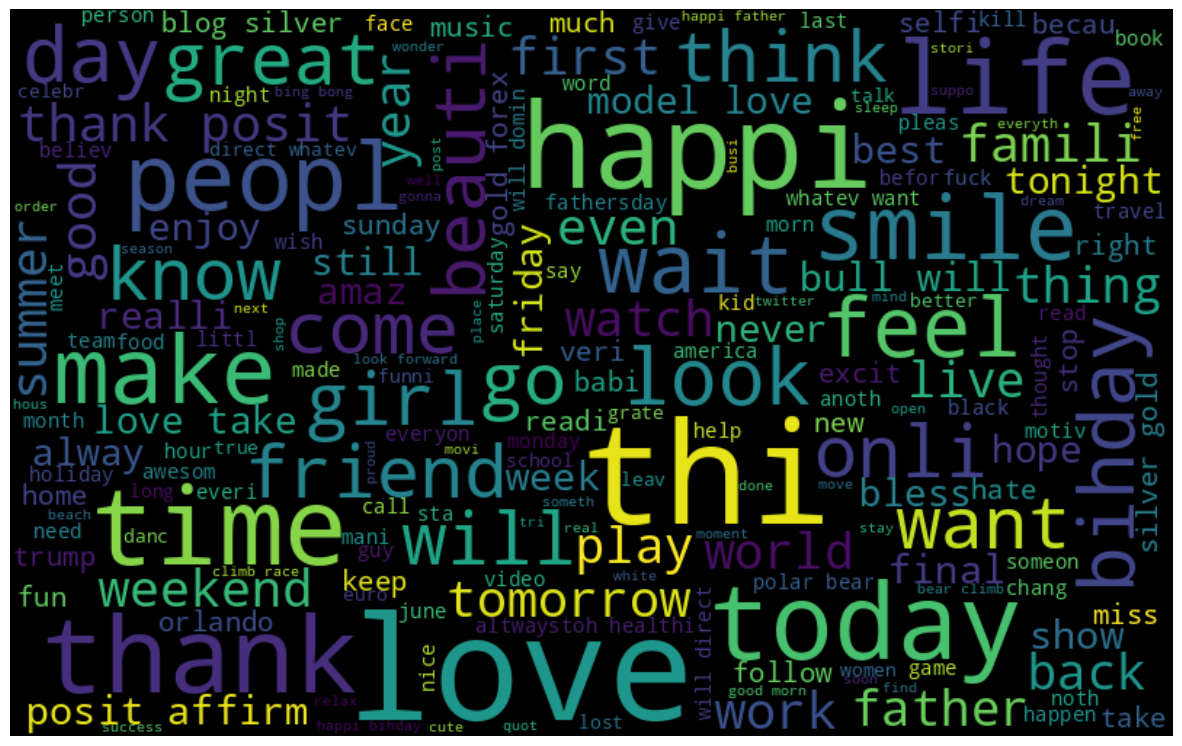

In [48]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state = 40, max_font_size = 100).generate(all_words)

# plot the graph
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

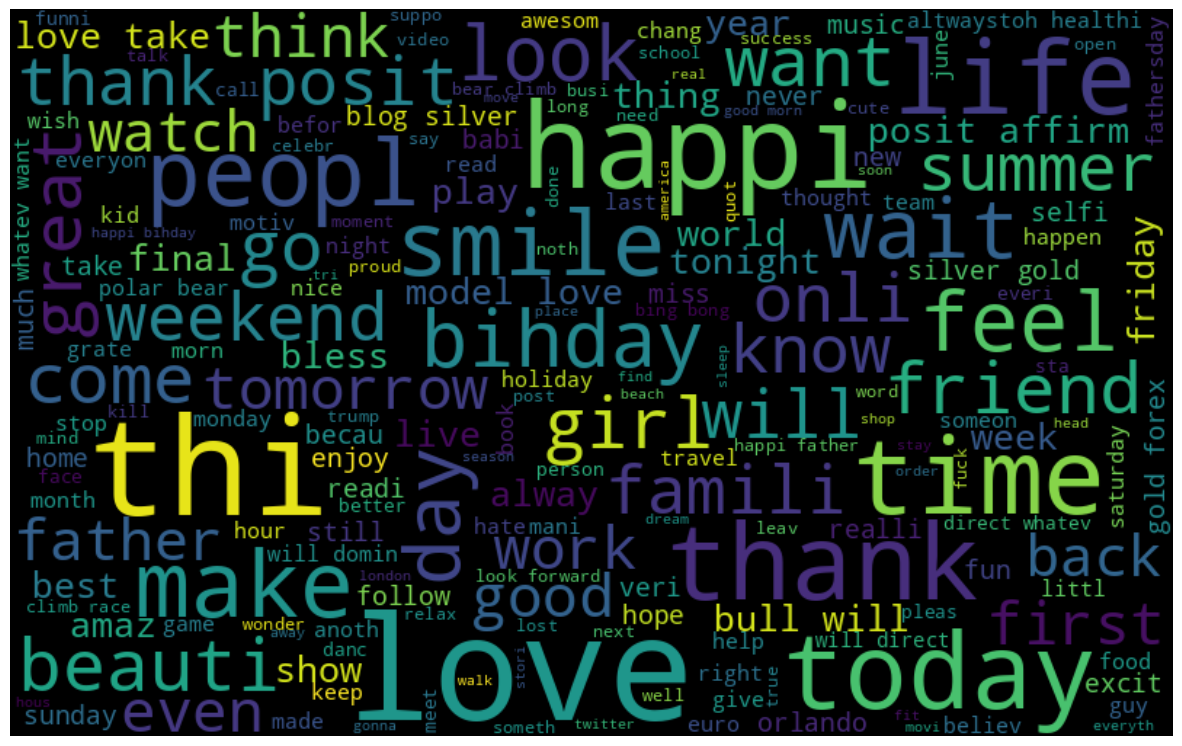

In [49]:
# frequent word visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 40, max_font_size = 100).generate(all_words)

# plot the graph
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

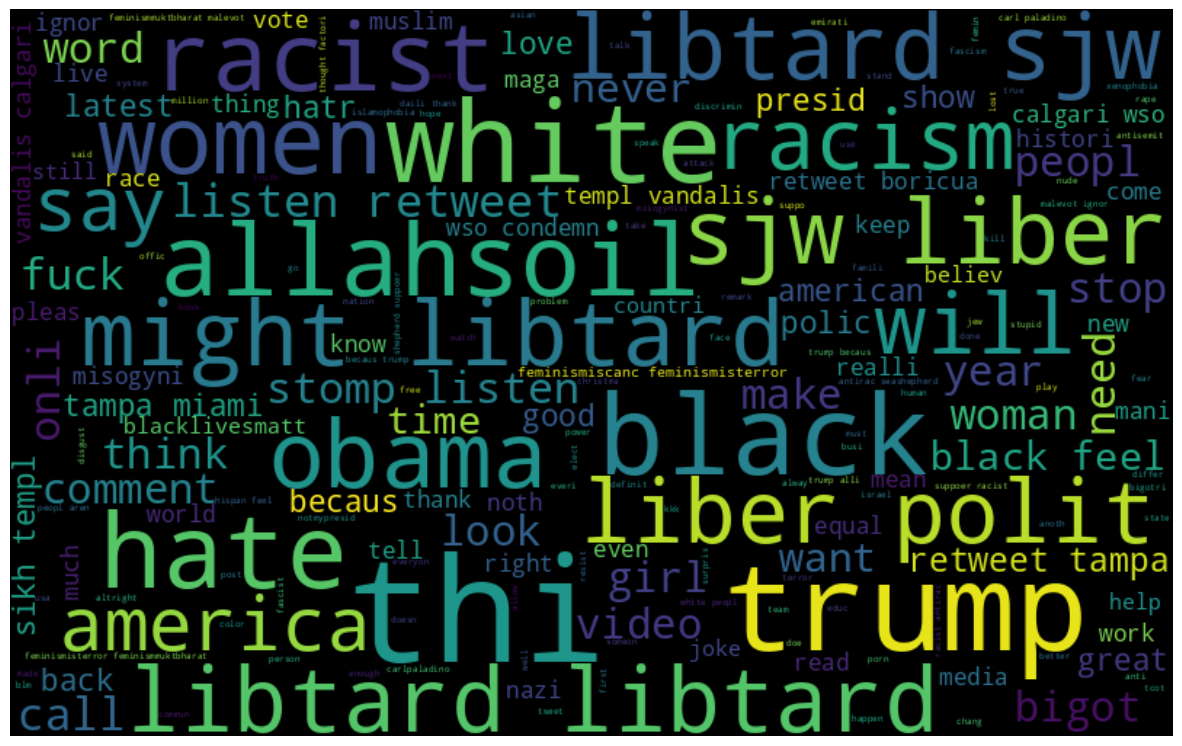

In [50]:
# frequent word visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state = 40, max_font_size = 100).generate(all_words)

# plot the graph
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r'#(\w+)', tweet)
        hashtags.append(ht)
    return hashtags

In [52]:
# extract hashtags from non-racists/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label'] == 0])

# extract hashtags from racists/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label'] == 1])

In [53]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [54]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [55]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [56]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


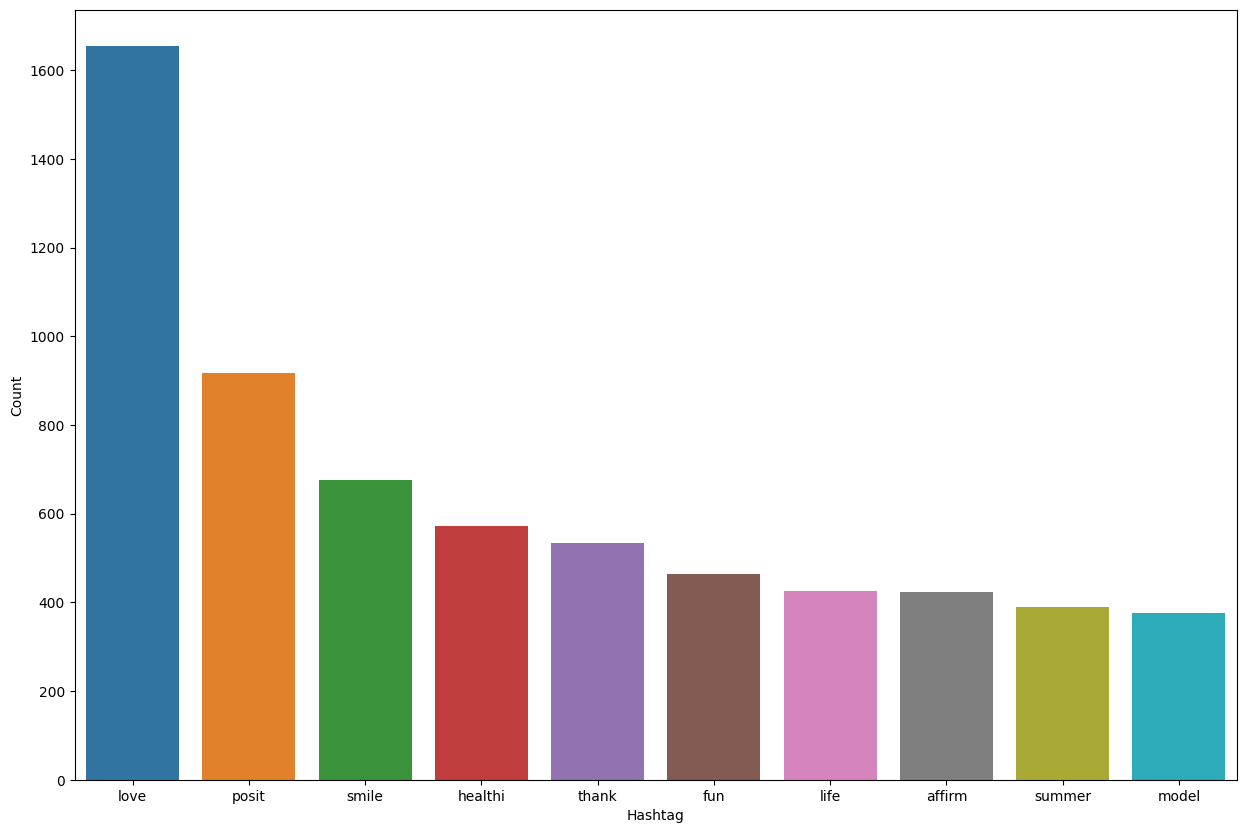

In [57]:
# select top 10 hashtag
d = d.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (15, 10))
sns.barplot(d, x = 'Hashtag', y = 'Count')
plt.show()

In [58]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


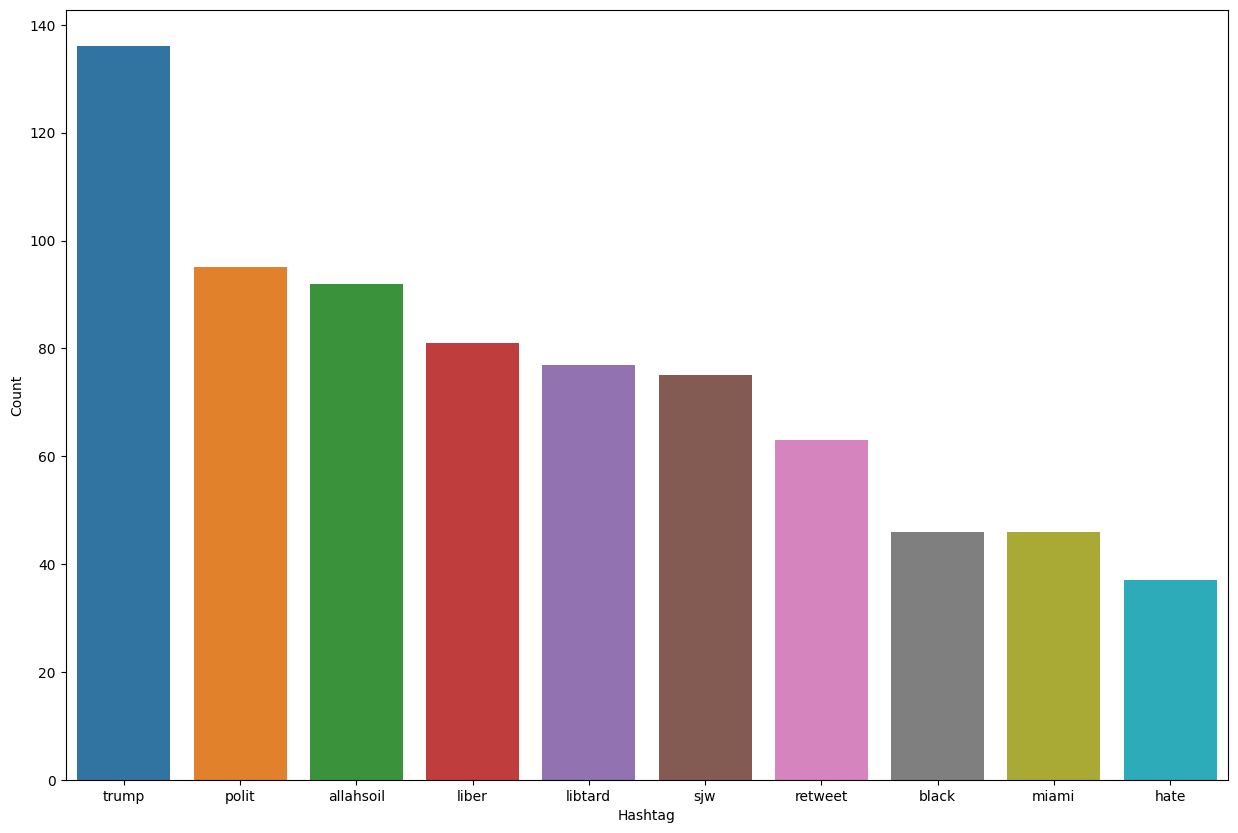

In [59]:
d = d.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (15, 10))
sns.barplot(d, x = 'Hashtag', y = 'Count')
plt.show()

# Input Split

In [60]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [61]:
# bow[0].toarray()

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], test_size = 0.25, random_state = 40)

# Model Training

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [64]:
y_pred = model.predict(x_test)
f1_score(y_test, y_pred)

0.5200517464424322

In [65]:
accuracy_score(y_test, y_pred)

0.9535727693655363

In [66]:
# use probability to predict
pred_prob = model.predict_proba(x_test)
y_pred = pred_prob[:,1] >= 0.3
y_pred = y_pred.astype(np.int)

f1_score(y_test, y_pred)

0.542766631467793

In [67]:
accuracy_score(y_test, y_pred)

0.9458140407958954